# ДЗ №2

In [1]:
import numpy as np

import keras
from keras.datasets import mnist

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# from silence_tensorflow import silence_tensorflow
# silence_tensorflow()

## Исходный вариант сети

1. Получение данных

In [3]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

In [4]:
print(train_images.shape)
train_images[:2]

(60000, 28, 28)


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

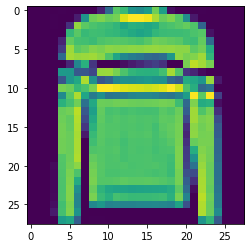

In [5]:
plt.imshow(train_images[5])

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

2. Обработка данных

In [7]:
# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

print(train_images.shape)
train_images[:2]

(60000, 28, 28)


array([[[-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5],
        [-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5],
        [-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5],
        ...,
        [-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5],
        [-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5],
        [-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5]],

       [[-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5],
        [-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5],
        [-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5],
        ...,
        [-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5],
        [-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5],
        [-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5]]])

In [8]:
# Flatten the images.
# train_images = train_images.reshape((-1, 784))
# test_images = test_images.reshape((-1, 784))

print(train_images.shape) # (60000, 784)
print(test_images.shape)  # (10000, 784)
train_images[:2]

(60000, 28, 28)
(10000, 28, 28)


array([[[-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5],
        [-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5],
        [-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5],
        ...,
        [-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5],
        [-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5],
        [-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5]],

       [[-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5],
        [-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5],
        [-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5],
        ...,
        [-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5],
        [-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5],
        [-0.5, -0.5, -0.5, ..., -0.5, -0.5, -0.5]]])

In [9]:
type(train_images)

numpy.ndarray

3. Архитектура сети

In [10]:
model = Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),
  Dense(128, activation='relu'),
  Dense(10, activation='softmax')
])

4. Компиляция модели

In [11]:
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

5. Обучение модели

In [12]:
model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=10,
  batch_size=32,
)

Epoch 1/10
60000/60000 [==============================] - 20s 341us/step - loss: 0.4890 - accuracy: 0.8231
Epoch 2/10
60000/60000 [==============================] - 18s 307us/step - loss: 0.3740 - accuracy: 0.8648
Epoch 3/10
60000/60000 [==============================] - 19s 319us/step - loss: 0.3383 - accuracy: 0.8749
Epoch 4/10
60000/60000 [==============================] - 20s 337us/step - loss: 0.3135 - accuracy: 0.8842
Epoch 5/10
60000/60000 [==============================] - 20s 328us/step - loss: 0.2972 - accuracy: 0.8899
Epoch 6/10
60000/60000 [==============================] - 18s 296us/step - loss: 0.2800 - accuracy: 0.8964
Epoch 7/10
60000/60000 [==============================] - 19s 309us/step - loss: 0.2670 - accuracy: 0.9024
Epoch 8/10
60000/60000 [==============================] - 19s 312us/step - loss: 0.2554 - accuracy: 0.9057
Epoch 9/10
60000/60000 [==============================] - 19s 315us/step - loss: 0.2469 - accuracy: 0.9091
Epoch 10/10
60000/60000 [============

In [13]:
to_categorical(train_labels)

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

6. Оценка обучения

In [14]:
model.evaluate(
  test_images,
  to_categorical(test_labels)
)

10000/10000 [==============================] - 2s 172us/step


[0.3611602590084076, 0.8744000196456909]

In [15]:
model.metrics_names

['loss', 'accuracy']

7. Сохранение обученной модели

In [16]:
model.save_weights('model.h5')

In [17]:
# Load the model from disk later using:
# model.load_weights('model.h5')

8. Применение на первых 10 изображениях

In [18]:
predictions_10 = model.predict(test_images[:10])
print(np.argmax(predictions_10, axis=1))

[9 2 1 1 6 1 4 6 5 7]


Сравнение с проверочными метками

In [19]:
print(test_labels[:10])

[9 2 1 1 6 1 4 6 5 7]


In [20]:
predictions = model.predict(test_images)
predictions = np.argmax(predictions, axis=1)
print(f"accuracy_score test:\t{accuracy_score(test_labels, predictions):.3f}\n\n")

accuracy_score test:	0.874




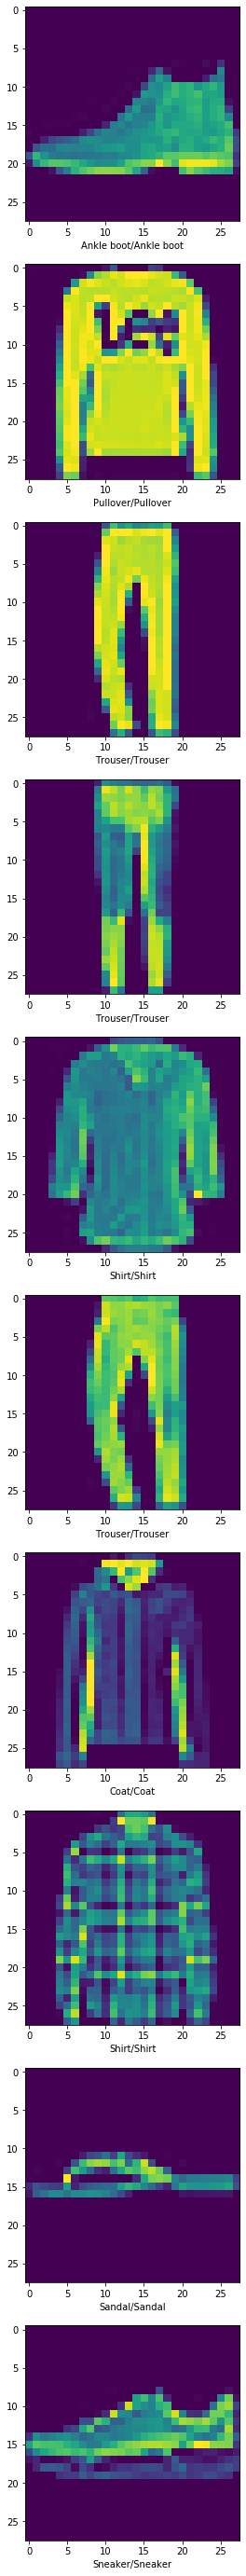

In [21]:
plt.figure(figsize=(5,50))
for i in range(10):
    plt.subplot(10, 1,i+1)
    plt.imshow(test_images[i])
    plt.grid(False)
    plt.xlabel(class_names[np.argmax(predictions_10[i])]+"/"+class_names[test_labels[i]])
    #print(f'Предсказанный класс: {}\n Действительный класс: {} \n\n')

## Подбор параметров

In [22]:
# нужны глобальные: train_images, train_labels, test_images, test_labels
def build_eval_nn(ep_n = 5, b_s = 32, n_num = 64, add_layer = False, vr = 1):
    if (add_layer):
        model = Sequential([keras.layers.Flatten(input_shape=(28, 28)),
                            Dense(n_num, activation='relu'),
                            Dense(n_num, activation='relu'),
                            Dense(n_num, activation='relu'),
                            Dense(10, activation='softmax')])
    else:
        model = Sequential([keras.layers.Flatten(input_shape=(28, 28)),
                            Dense(n_num, activation='relu'),
                            Dense(n_num, activation='relu'),
                            Dense(10, activation='softmax')])
    
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    fit_data = model.fit(train_images,
                         to_categorical(train_labels),
                         epochs = ep_n,
                         batch_size = b_s, 
                         verbose = vr)
    
    model_loss, model_accuracy = model.evaluate(test_images,
                                                to_categorical(test_labels), 
                                                verbose = 0)
    return model_loss, model_accuracy, fit_data

### Профиль loss и accuracy на train данных (модель 2 скрытых слоя)

In [23]:
model_loss, model_accuracy, fit_data = build_eval_nn(ep_n = 25)
fit_data.history

Epoch 1/25
60000/60000 [==============================] - 14s 234us/step - loss: 0.5016 - accuracy: 0.8179
Epoch 2/25
60000/60000 [==============================] - 14s 230us/step - loss: 0.3830 - accuracy: 0.8605
Epoch 3/25
60000/60000 [==============================] - 15s 244us/step - loss: 0.3493 - accuracy: 0.8704
Epoch 4/25
60000/60000 [==============================] - 15s 256us/step - loss: 0.3251 - accuracy: 0.8801
Epoch 5/25
60000/60000 [==============================] - 15s 242us/step - loss: 0.3079 - accuracy: 0.8864
Epoch 6/25
60000/60000 [==============================] - 16s 268us/step - loss: 0.2918 - accuracy: 0.8916
Epoch 7/25
60000/60000 [==============================] - 16s 258us/step - loss: 0.2796 - accuracy: 0.8959
Epoch 8/25
60000/60000 [==============================] - 15s 256us/step - loss: 0.2700 - accuracy: 0.8992
Epoch 9/25
60000/60000 [==============================] - 16s 263us/step - loss: 0.2592 - accuracy: 0.9034
Epoch 10/25
60000/60000 [============

{'loss': [0.5016435791492462,
  0.38302335006395977,
  0.3493373089591662,
  0.325115515478452,
  0.3078736140708129,
  0.29178937430381774,
  0.27958713211218517,
  0.26997435348828636,
  0.25915056698918343,
  0.24969616504510245,
  0.2435875939587752,
  0.23582956718901793,
  0.2300353160937627,
  0.22282429635425408,
  0.21701137695610523,
  0.210515488037467,
  0.2058561179657777,
  0.2018387544438243,
  0.19675277281999587,
  0.1923334979434808,
  0.189811953471601,
  0.18418506503800552,
  0.18042387884010871,
  0.17753013379722835,
  0.17374393970717986],
 'accuracy': [0.8179333,
  0.86045,
  0.8703667,
  0.88005,
  0.88638335,
  0.8915833,
  0.8958833,
  0.8992,
  0.9033833,
  0.90571666,
  0.9083667,
  0.91165,
  0.9123333,
  0.91575,
  0.9177167,
  0.9202167,
  0.92198336,
  0.92371666,
  0.92465,
  0.92718333,
  0.92775,
  0.9312,
  0.9327833,
  0.93215,
  0.9346167]}

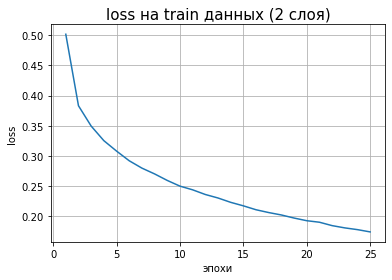

In [24]:
plt.plot(np.arange(1, 26), fit_data.history['loss'])
plt.title('loss на train данных (2 слоя)', fontsize=15)
plt.ylabel('loss')
plt.xlabel('эпохи')
plt.grid(True)
plt.show()

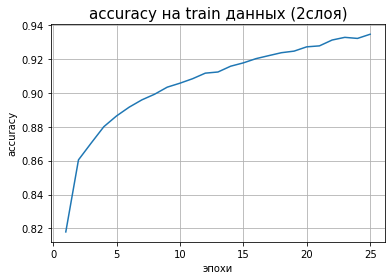

In [25]:
plt.plot(np.arange(1, 26), fit_data.history['accuracy'])
plt.title('accuracy на train данных (2слоя)', fontsize=15)
plt.ylabel('accuracy')
plt.xlabel('эпохи')
plt.grid(True)
plt.show()

### Профиль accuracy на тестовых данных (модель 2 скрытых слоя)

In [26]:
def draw_epoch_test_profile(ep_line, vr_l = 2):
    # ep_line = [3, 5, 7, 9, 11, 13, 15] #]
    m_acc = []
    
    for ep in ep_line:
        print(f"Количество эпох при обучении: {ep}")
        m_acc.append(build_eval_nn(ep_n = ep, vr = vr_l)[1])
    
    plt.plot(ep_line, m_acc, 'ob')
    plt.title('accuracy на тестовых данных', fontsize=15)
    plt.ylabel('accuracy')
    plt.xlabel('Количество эпох при обучении')
    plt.grid(True)
    plt.show()

Количество эпох при обучении: 3
Epoch 1/3
 - 12s - loss: 0.5018 - accuracy: 0.8189
Epoch 2/3
 - 12s - loss: 0.3834 - accuracy: 0.8601
Epoch 3/3
 - 11s - loss: 0.3485 - accuracy: 0.8712
Количество эпох при обучении: 5
Epoch 1/5
 - 11s - loss: 0.5011 - accuracy: 0.8185
Epoch 2/5
 - 11s - loss: 0.3827 - accuracy: 0.8597
Epoch 3/5
 - 11s - loss: 0.3441 - accuracy: 0.8735
Epoch 4/5
 - 11s - loss: 0.3223 - accuracy: 0.8806
Epoch 5/5
 - 11s - loss: 0.3032 - accuracy: 0.8878
Количество эпох при обучении: 7
Epoch 1/7
 - 12s - loss: 0.5026 - accuracy: 0.8190
Epoch 2/7
 - 11s - loss: 0.3814 - accuracy: 0.8610
Epoch 3/7
 - 11s - loss: 0.3466 - accuracy: 0.8720
Epoch 4/7
 - 11s - loss: 0.3224 - accuracy: 0.8811
Epoch 5/7
 - 11s - loss: 0.3056 - accuracy: 0.8855
Epoch 6/7
 - 11s - loss: 0.2905 - accuracy: 0.8918
Epoch 7/7
 - 11s - loss: 0.2789 - accuracy: 0.8971
Количество эпох при обучении: 9
Epoch 1/9
 - 11s - loss: 0.4985 - accuracy: 0.8190
Epoch 2/9
 - 11s - loss: 0.3790 - accuracy: 0.8600
Epoch

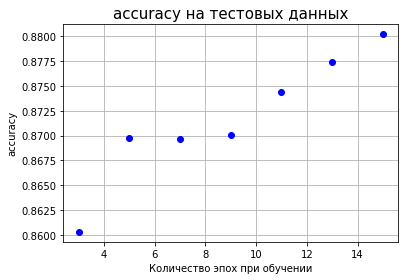

In [27]:
draw_epoch_test_profile(np.arange(3, 16, 2))

### Профиль loss и accuracy на train данных (модель 3 скрытых слоя)

In [28]:
model_loss, model_accuracy, fit_data = build_eval_nn(ep_n = 25, add_layer = True)

Epoch 1/25
60000/60000 [==============================] - 17s 279us/step - loss: 0.5086 - accuracy: 0.8151
Epoch 2/25
60000/60000 [==============================] - 18s 307us/step - loss: 0.3777 - accuracy: 0.8615
Epoch 3/25
60000/60000 [==============================] - 18s 295us/step - loss: 0.3427 - accuracy: 0.8733
Epoch 4/25
60000/60000 [==============================] - 16s 269us/step - loss: 0.3188 - accuracy: 0.8813
Epoch 5/25
60000/60000 [==============================] - 17s 289us/step - loss: 0.3028 - accuracy: 0.8871
Epoch 6/25
60000/60000 [==============================] - 17s 288us/step - loss: 0.2894 - accuracy: 0.8922
Epoch 7/25
60000/60000 [==============================] - 18s 304us/step - loss: 0.2783 - accuracy: 0.8961
Epoch 8/25
60000/60000 [==============================] - 18s 298us/step - loss: 0.2681 - accuracy: 0.9002
Epoch 9/25
60000/60000 [==============================] - 18s 308us/step - loss: 0.2584 - accuracy: 0.9036
Epoch 10/25
60000/60000 [============

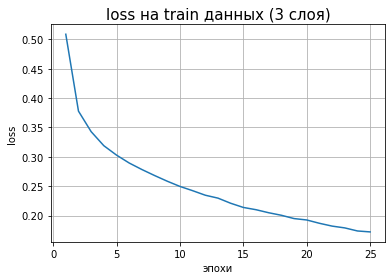

In [29]:
plt.plot(np.arange(1, 26), fit_data.history['loss'])
plt.title('loss на train данных (3 слоя)', fontsize=15)
plt.ylabel('loss')
plt.xlabel('эпохи')
plt.grid(True)
plt.show()

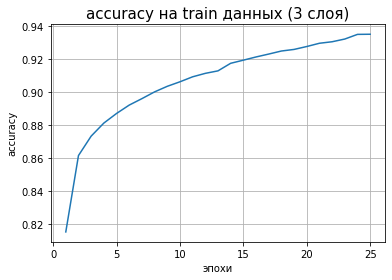

In [30]:
plt.plot(np.arange(1, 26), fit_data.history['accuracy'])
plt.title('accuracy на train данных (3 слоя)', fontsize=15)
plt.ylabel('accuracy')
plt.xlabel('эпохи')
plt.grid(True)
plt.show()

### grid search

In [31]:
def grid_search(batch_size, n_num, add_l = False, ep = 5, vr = 0):
    b_acc = b_b_s = b_n_n = 0

    for b_s in batch_size:
        for n_n in n_num:
            print(f"Модель - эпох: {ep}, batch_size: {b_s}, нейронов в слое: {n_n}")
            model_loss, model_accuracy, fit_data = build_eval_nn(ep_n = ep, 
                                                                 b_s = b_s, 
                                                                 n_num = n_n,
                                                                 add_layer = add_l,
                                                                 vr = 0)
            print(f"\t model_loss: {model_loss:.4f}, model_accuracy: {model_accuracy:.4f}")
            if b_acc < model_accuracy:
                b_acc = model_accuracy
                b_b_s = b_s
                b_n_n = n_n
    
    print(f"\nЛучший показатель accuracy на тестовых данных: {b_acc}")
    print(f"\tПараметры модели - batch_size: {b_b_s}, нейронов в слое: {b_n_n}")

In [32]:
batch_size = [24, 32, 48]
n_num = [56, 64, 78]
#add_layer = [False, True]

grid_search(batch_size, n_num)

Модель - эпох: 5, batch_size: 24, нейронов в слое: 56
	 model_loss: 0.3601, model_accuracy: 0.8717
Модель - эпох: 5, batch_size: 24, нейронов в слое: 64
	 model_loss: 0.3612, model_accuracy: 0.8710
Модель - эпох: 5, batch_size: 24, нейронов в слое: 78
	 model_loss: 0.3686, model_accuracy: 0.8681
Модель - эпох: 5, batch_size: 32, нейронов в слое: 56
	 model_loss: 0.3652, model_accuracy: 0.8702
Модель - эпох: 5, batch_size: 32, нейронов в слое: 64
	 model_loss: 0.3717, model_accuracy: 0.8634
Модель - эпох: 5, batch_size: 32, нейронов в слое: 78
	 model_loss: 0.3460, model_accuracy: 0.8765
Модель - эпох: 5, batch_size: 48, нейронов в слое: 56
	 model_loss: 0.3572, model_accuracy: 0.8728
Модель - эпох: 5, batch_size: 48, нейронов в слое: 64
	 model_loss: 0.3614, model_accuracy: 0.8719
Модель - эпох: 5, batch_size: 48, нейронов в слое: 78
	 model_loss: 0.3662, model_accuracy: 0.8705

Лучший показатель accuracy на тестовых данных: 0.8765000104904175
	Параметры модели - batch_size: 32, нейрон

In [34]:
model = Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),
  Dense(128, activation='relu'),
  Dense(10, activation='softmax')
])

model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=35,
  batch_size=32,
)

model.evaluate(
  test_images,
  to_categorical(test_labels)
)

Epoch 1/35
60000/60000 [==============================] - 18s 306us/step - loss: 0.4837 - accuracy: 0.8251
Epoch 2/35
60000/60000 [==============================] - 20s 335us/step - loss: 0.3732 - accuracy: 0.8636
Epoch 3/35
60000/60000 [==============================] - 19s 312us/step - loss: 0.3395 - accuracy: 0.8760
Epoch 4/35
60000/60000 [==============================] - 18s 300us/step - loss: 0.3145 - accuracy: 0.8836
Epoch 5/35
60000/60000 [==============================] - 18s 298us/step - loss: 0.2965 - accuracy: 0.8904
Epoch 6/35
60000/60000 [==============================] - 18s 298us/step - loss: 0.2807 - accuracy: 0.8964
Epoch 7/35
60000/60000 [==============================] - 18s 302us/step - loss: 0.2687 - accuracy: 0.9012
Epoch 8/35
60000/60000 [==============================] - 20s 327us/step - loss: 0.2584 - accuracy: 0.9047
Epoch 9/35
60000/60000 [==============================] - 20s 341us/step - loss: 0.2478 - accuracy: 0.9098
Epoch 10/35
60000/60000 [============

[0.4398392338603735, 0.8851000070571899]

__Оптимальные найденные параметры: один скрытый слой 128 нейронов, функция активации relu, метрика на train продолжает улучшаться при 35 эпохах. Усложнение модели не даёт улучение метрики. Сильный эффект оказывает использование модели без избыточной сложности и увеличение числа эпох__